In [2]:
import sys
sys.path.append('../')

# library to check
import validation
import validation.regression_plots as rpl

In [3]:
%config InlineBackend.figure_format='retina'
%matplotlib inline

In [4]:
import matplotlib_defaults

SFL style loaded...


In [5]:
import pandas as pd
import numpy as np

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [6]:

df = pd.DataFrame(np.random.random(size=(100, 8)), 
                  columns=list('ABCDEFGH'))


In [31]:
df['class_g'] = df['G'].apply(lambda x: 'GOOD' if x > 0.5 else 'BAD' )

In [7]:
df.head()

,A,B,C,D,E,F,G,H
0,0.182959,0.197833,0.779461,0.107518,0.299749,0.013100,0.993699,0.106266
1,0.139576,0.909337,0.548583,0.803272,0.983698,0.359742,0.235966,0.553313
2,0.926758,0.156038,0.435723,0.900020,0.855390,0.787159,0.292675,0.213530
3,0.197189,0.581278,0.606303,0.007342,0.990146,0.489303,0.049099,0.341313
4,0.451488,0.006724,0.693100,0.756623,0.126705,0.152572,0.453027,0.460688


# Scatter Plots

In [ ]:
NEED TO ADD RESIDUAL PLOT BELOW

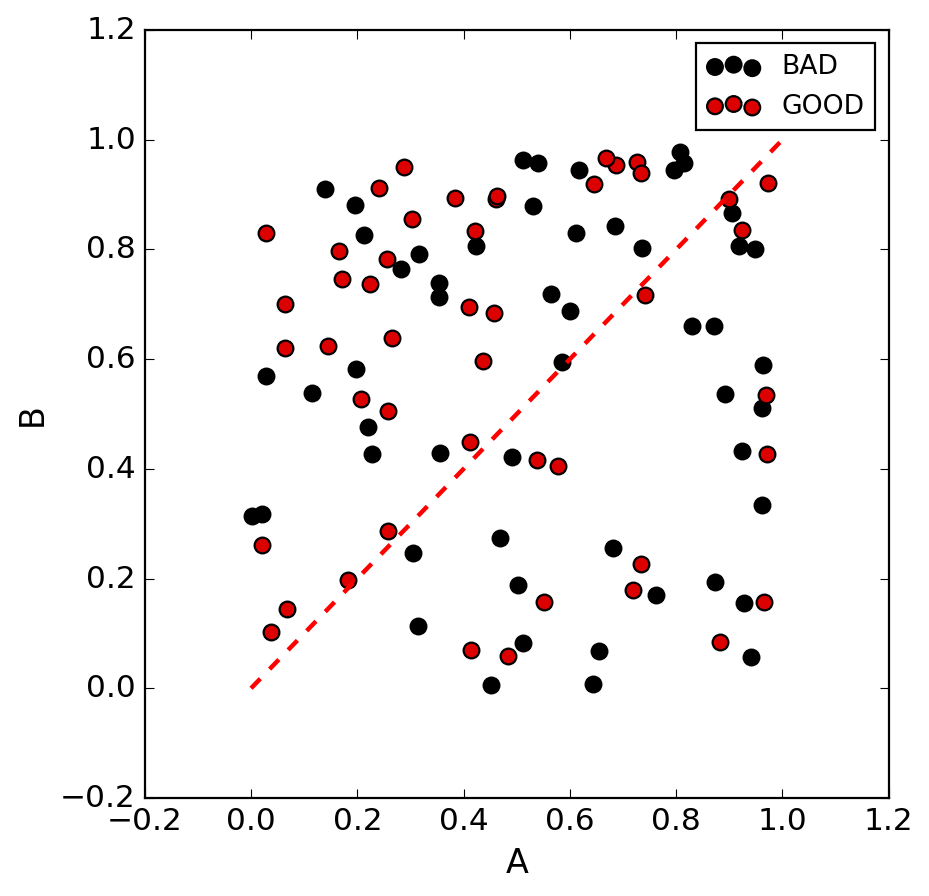

In [71]:
plt.figure(figsize=(6,6))
rpl.scatter_plot(df, 
                 truth_col = 'A', 
                 pred_col = 'B', 
                 class_col = 'class_g', 
                 s = 50)

In [73]:
reload(rpl)

<module 'validation.regression_plots' from '../validation/regression_plots.py'>

In [98]:

def cumulative_histogram(act_list, pred_list, n_bins_pred=25, max_pred=1, max_delta=0.2,  n_bins_delta=100):
    """
        create cumulative residual histogram normalised to counts
    """
    # set up bin widths 
    x_bin_width = (max_pred/n_bins_pred)
    y_bin_width = (max_delta/n_bins_delta)
    x_bins = [int((x)*x_bin_width) for x in range(n_bins_pred+1)]
    y_bins = [int((x-np.floor(n_bins_delta))*y_bin_width) for x in range(n_bins_delta*2+1)]
        
    
    # sum all  
    cumulative_hist = np.zeros((len(x_bins)-1,len(y_bins)-1))
    for pred, act in zip(pred_list, act_list):
        # get the counts using the plot
        bins, x, y, _ = plt.hist2d( 
                          pred, 
                          (pred - act),
                          bins = (x_bins, y_bins))

        # normalise to the total number 
        cumulative_hist += bins/np.sum(bins)
        
    # suppress plot output
    plt.close()
    return cumulative_hist, x, y


def compute_confidence_bands(act_list, pred_list, conf_levels=[0.05, 0.95], n_bins_pred=25, max_pred=2,  show_plot=True):
    """
        compute confidence band list
    """
    import matplotlib.cm as cm
    cumulative_hist, x, y = cumulative_histogram(act_list, pred_list)
        
    # normalise to each x-axis bin
    norm_hist = cumulative_hist / np.sum(cumulative_hist, axis=1, keepdims=True) 
    
    # fix any rows that have 1s except the end...
    
    
    # cumulative sum
    cumulative_hist_sum = np.cumsum(norm_hist, axis=1)

    # loop over different quantiles and read off where y is
    conf_bands = {}
    for conf_level in conf_levels:
        x_bins = []
        conf_band = []
        # loop over the x values
        for ix, x_bin in enumerate(cumulative_hist_sum):
            # find where y percentile > conf_level and save it for each step in x
            is_exceed = False
            for iy, x_val in enumerate(x_bin):
                if x_val >= conf_level:
                    conf_band.append(y[iy])
                    is_exceed = True
                    break
            
            # defaults to previous value if threshold not found
            if not is_exceed:
                if len(conf_band) > 0:
                    print('[warning]: no data in x-bin, defaulting to previous value...')
                    conf_band.append(conf_band[-1])
                else:
                    conf_band.append(0)
            x_bins.append(x[ix] + (max_pred/n_bins_pred)/2)
        
        # save for output
        conf_bands[conf_level] = conf_band
        
    if show_plot:
        fig, ax = plt.subplots()
        cs = ax.imshow(norm_hist.T, origin='bottom', extent=(np.min(x),np.max(x),np.min(y),np.max(y)), 
                  aspect='auto', cmap=cm.Reds)
        cb = fig.colorbar(cs)
        cb.set_label('Predicted Bucket Density',size=15,rotation=270, labelpad=15)
        ax.set_xlabel('Predicted',size=14)
        ax.set_ylabel('Predicted - Actual',size=14)
        for conf_band in conf_bands:
            # note we add on just for the plot to extend to end 
            plt.plot([x[0]] + x_bins + [x[-1]], [conf_bands[conf_band][0]] + conf_bands[conf_band]+[conf_bands[conf_band][-1]],  lw=4, label='{0:.2f}'.format(round(conf_band,2)))

        plt.legend(loc='upper right',fontsize=7,title='C.L.')
        
    
    return conf_bands, x_bins

   

# Error Bands

[warning]: no data in x-bin, defaulting to previous value...
[warning]: no data in x-bin, defaulting to previous value...
[warning]: no data in x-bin, defaulting to previous value...
[warning]: no data in x-bin, defaulting to previous value...
[warning]: no data in x-bin, defaulting to previous value...
[warning]: no data in x-bin, defaulting to previous value...
[warning]: no data in x-bin, defaulting to previous value...
[warning]: no data in x-bin, defaulting to previous value...
[warning]: no data in x-bin, defaulting to previous value...
[warning]: no data in x-bin, defaulting to previous value...
[warning]: no data in x-bin, defaulting to previous value...
[warning]: no data in x-bin, defaulting to previous value...
[warning]: no data in x-bin, defaulting to previous value...
[warning]: no data in x-bin, defaulting to previous value...
[warning]: no data in x-bin, defaulting to previous value...
[warning]: no data in x-bin, defaulting to previous value...
[warning]: no data in x-

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_base.py:3471: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=0, top=0
  'bottom=%s, top=%s') % (bottom, top))
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in true_divide


({0.05: [0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0],
  0.95: [0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0]},
 [0.04,
  0.04,
  0.04,
  0.04,
  0.04,
  0.04,
  0.04,
  0.04,
  0.04,
  0.04,
  0.04,
  0.04,
  0.04,
  0.04,
  0.04,
  0.04,
  0.04,
  0.04,
  0.04,
  0.04,
  0.04,
  0.04,
  0.04,
  0.04,
  0.04])

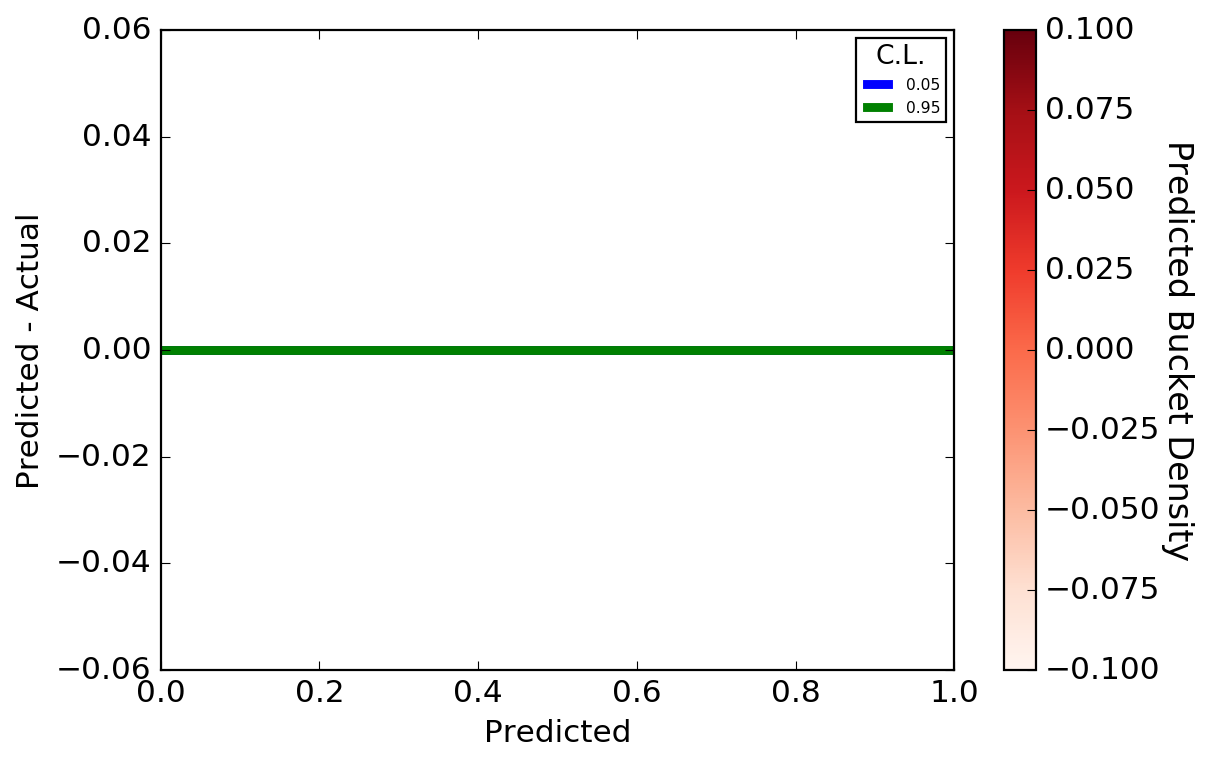

In [99]:
compute_confidence_bands([df['A']], [df['B']])

In [ ]:
# 